In [14]:
# Continuous Optimization: Shifted Schwefel's Problem 2.21 (F2) with D=50

# Import all the necessary packages
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time

In [15]:
# Read data from csv
raw_data = pd.read_csv("./Schwefel’s_Problem.csv")
schwefel = raw_data["val"].tolist()
print(schwefel)
print(type(schwefel))

[-26.88789884, -4.909030415, -56.82602541, -95.04366961, -4.33977568, -50.29706885, -2.752898866, -84.85615341, -74.5337273, -60.38027439, -61.20629046, -53.79117548, -4.573086919, -28.68521742, -87.25376791, -56.48486646, -50.78741553, -42.89537332, -78.49578055, -76.62817566, -47.80620519, -78.91999865, -65.53260072, -55.28958734, -6.8978558, -31.46403574, -22.1279746, -71.8624828, -55.59740568, -47.01394993, -75.02727078, -72.12981268, -50.36871813, -62.99448664, -96.77179229, -81.60507136, -96.62765606, -53.33609971, -60.05551455, -63.20197214, -5.809143248, -72.12204782, -21.86907842, -48.63138484, -2.334503675, -82.18599214, -13.86416463, -68.07465509, -37.04968423, -83.46476402, -6.156487287000001, -47.89816496, -39.79192138, -29.85662653, -2.496362827, -48.40524967, -40.46628778, -95.2986591, -1.7085972440000001, -45.79806592, -58.60943908, -92.3829385, -44.50341972, -16.83509374, -66.68654033, -76.668899, -82.25343293, -3.4542530030000003, -32.77888349, -83.30193885, -32.58334

In [16]:
# Initialize function parameters
D = 50
bias = -450
lower_bound = -100
upper_bound = 100
sol_list = []

In [17]:
# Define the Shifted Schwefel's Problem 2.21 with the previous parameters
def function(x, data=schwefel, dim=D, f_bias=bias):
    F = abs(x[0] - data[0])
    for i in range(1, dim - 1):
        z = x[i] - data[i]
        F = max(F, abs(z))
    res = F + f_bias
    return res

In [18]:
# Create a function to gather all the solutions computed. To be used in callback
def sol_set(xk):
    sol_res = function(xk)
    sol_list.append(sol_res)
    return sol_res

In [19]:
# Create a function to compute the initial guess with random uniform distribution
def sol_init(dim, lower_bound, upper_bound):
    xmin = lower_bound * np.ones(dim)
    xmax = upper_bound * np.ones(dim)
    x0 = np.random.uniform(min(xmin), max(xmax), dim)
    return x0

In [20]:
# Create a function to solve this problem
def solver(dimension, lower_bound, upper_bound):
    global sol
    # Compute the initial guess
    x0 = sol_init(dimension, lower_bound, upper_bound)
    # Minimize the function thanks to the BFGS algorithm
    sol = minimize(sol_set, x0, bounds=(lower_bound, upper_bound), method='BFGS', callback=sol_set)
    return sol, sol_list

In [27]:
# Create a function to plot the convergence curve
def plot_fitness(solution):
    fig = plt.figure(figsize=(16, 13))
    plt.plot(solution)
    plt.title("Continuous Optimization: Shifted Schwefel's Problem 2.21 (F2) with D=50", fontsize=16)
    plt.xlabel("Time (iterations)", fontsize=12)
    plt.ylabel("Fitness", fontsize=12)
    plt.show()

In [28]:
# Start timer to get computational time
t1 = time.time()

In [29]:
# Solve the problem
solver(D, lower_bound, upper_bound)

(      fun: -445.79789130264453
  hess_inv: array([[ 5.29757372e-01, -3.39040673e-01, -6.98661039e-09, ...,
          5.11270545e-01,  5.06459076e-01,  0.00000000e+00],
        [-3.39040673e-01,  1.20579072e+01,  4.27218594e-09, ...,
         -3.70617712e-01, -3.69432131e-01,  0.00000000e+00],
        [-6.98661039e-09,  4.27218594e-09,  7.00149415e-09, ...,
         -7.96252731e-09, -7.88739107e-09,  0.00000000e+00],
        ...,
        [ 5.11270545e-01, -3.70617712e-01, -7.96252731e-09, ...,
          1.41828277e+01,  9.56230195e+00,  0.00000000e+00],
        [ 5.06459076e-01, -3.69432131e-01, -7.88739107e-09, ...,
          9.56230195e+00,  2.16763760e+01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])
       jac: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 

In [30]:
# Stop timer and compute computational time
t2 = time.time()
comp_time = t2 - t1

In [31]:
# Print parameters and solutions
print("==========================================================================\n")
print("Function: Shifted Schwefel's Problem 2.21 (F2)\n")
print("01. Chosen algorithm to solve the problem: BFGS from SciPy\n")
print("02. Parameters:")
print("\nDimension:", D)
print("\nSearch space: [", lower_bound, ",", upper_bound, "]")
print("\nBias:", bias)
print("\n03. Final results:")
sol_df = pd.DataFrame(sol.x, columns=[''])
sol_df.to_csv("Schwefel_sol50.csv", sep=",")
print("\n    - Solutions:", sol_df)
print("\n    - Fitness:", round(sol.fun, 2))
print("\nNumber of function evaluations:", sol.nfev)
print("\nStopping criterion:", sol.nit, "iterations")
print("\nComputational time:", round(comp_time, 2), "seconds\n")
print("==========================================================================")


Function: Shifted Schwefel's Problem 2.21 (F2)

01. Chosen algorithm to solve the problem: BFGS from SciPy

02. Parameters:

Dimension: 50

Search space: [ -100 , 100 ]

Bias: -450

03. Final results:

    - Solutions:              
0  -23.167590
1   -5.229339
2  -61.028134
3  -94.853349
4   -0.569459
5  -48.395534
6    0.169335
7  -85.424128
8  -72.415796
9  -62.289608
10 -60.999875
11 -53.306228
12  -4.017404
13 -30.821151
14 -88.610548
15 -58.303879
16 -48.166991
17 -39.285082
18 -74.870972
19 -73.790035
20 -47.196492
21 -79.946939
22 -67.219938
23 -53.209401
24 -10.486464
25 -31.222633
26 -21.503625
27 -73.927440
28 -57.430956
29 -47.765374
30 -79.229379
31 -70.412284
32 -51.033268
33 -63.613067
34 -97.965567
35 -78.156528
36 -95.490079
37 -52.340346
38 -59.989212
39 -62.951265
40  -5.868151
41 -69.463980
42 -18.955458
43 -49.697877
44  -1.327967
45 -85.999910
46 -12.020731
47 -67.553052
48 -39.705392
49  20.934983

    - Fitness: -445.8

Number of function evaluations: 8268

Stop

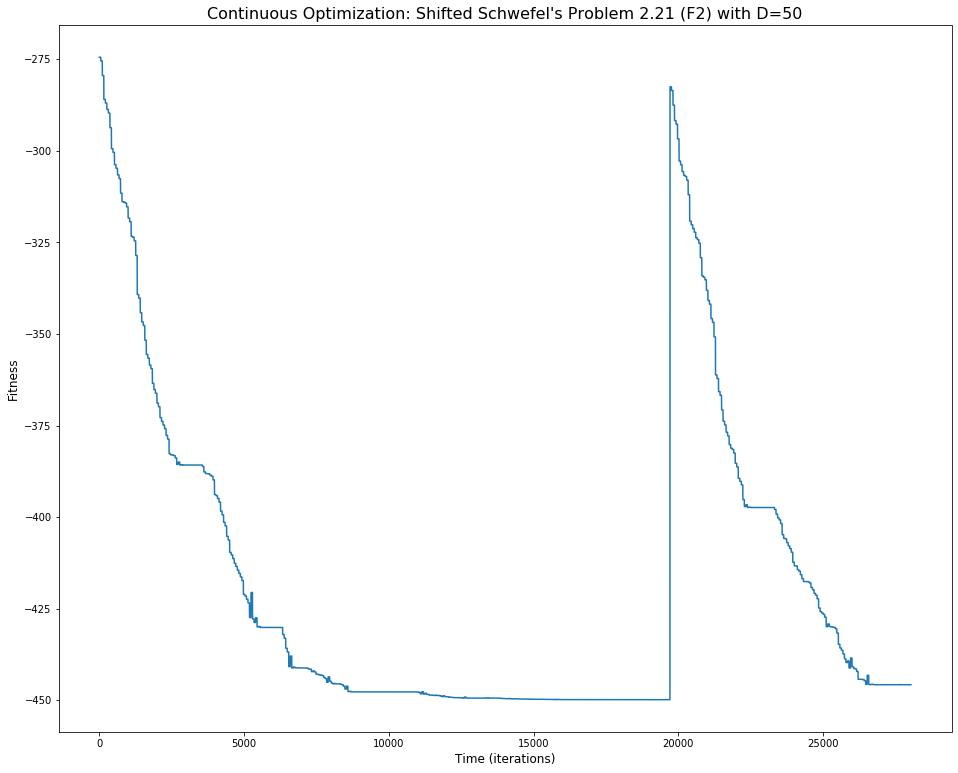

In [32]:
# Plot and save convergence curve
plot_fitness(sol_list)